In [1]:
# Intializing libraries

import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
# Connecting to Google Drive folder

from google.colab import drive
drive.mount('/content/gdrive/')
import sys
sys.path.append('/content/gdrive/MyDrive/DATA 606 - Capstone Project/')

Mounted at /content/gdrive/


In [3]:
# Loading the dataset into a dataframe from Google Drive

df = pd.read_csv('/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_multilingual_US_v1_00.tsv', sep='\t', error_bad_lines=False)

b'Skipping line 3231472: expected 15 fields, saw 22\n'
b'Skipping line 3509762: expected 15 fields, saw 22\n'
b'Skipping line 4018793: expected 15 fields, saw 22\n'
b'Skipping line 4280173: expected 15 fields, saw 22\nSkipping line 4290596: expected 15 fields, saw 22\n'
b'Skipping line 4331421: expected 15 fields, saw 22\nSkipping line 4340267: expected 15 fields, saw 22\nSkipping line 4341665: expected 15 fields, saw 22\nSkipping line 4386155: expected 15 fields, saw 22\nSkipping line 4388098: expected 15 fields, saw 22\n'
b'Skipping line 4408027: expected 15 fields, saw 22\nSkipping line 4442615: expected 15 fields, saw 22\n'
b'Skipping line 4519623: expected 15 fields, saw 22\n'
b'Skipping line 4525797: expected 15 fields, saw 22\nSkipping line 4543519: expected 15 fields, saw 22\n'
b'Skipping line 4587726: expected 15 fields, saw 22\nSkipping line 4589301: expected 15 fields, saw 22\nSkipping line 4634393: expected 15 fields, saw 22\n'
b'Skipping line 4666168: expected 15 fields, s

**The dataset has been loaded into the dataframe and bad records have been skipped.**

In [4]:
# Dataframe Shape

df.shape

(6900886, 15)

In [5]:
# Summary of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900886 entries, 0 to 6900885
Data columns (total 15 columns):
 #   Column             Dtype  
---  ------             -----  
 0   marketplace        object 
 1   customer_id        int64  
 2   review_id          object 
 3   product_id         object 
 4   product_parent     int64  
 5   product_title      object 
 6   product_category   object 
 7   star_rating        float64
 8   helpful_votes      float64
 9   total_votes        float64
 10  vine               object 
 11  verified_purchase  object 
 12  review_headline    object 
 13  review_body        object 
 14  review_date        object 
dtypes: float64(3), int64(2), object(10)
memory usage: 789.7+ MB


In [6]:
# First 5 rows of the dataset

df.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17


In [7]:
# Checking for null values

df.isna().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            1
helpful_votes          1
total_votes            1
vine                   1
verified_purchase      1
review_headline       75
review_body           76
review_date          324
dtype: int64

In [8]:
# Moving rows with null values into a dataframe

null_values = df[df.isna().any(axis=1)]
null_values.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
142642,US,52767614,RJBEAQJ92LS61,B00003CXDG,765637830,Mission: Impossible 2 (Widescreen Edition),Video DVD,2.0,0.0,0.0,N,N,Technology is not always beneficial -\tespecia...,2001-03-08,NaN
144995,US,51263804,RRR6EK045G5YL,630438551X,212477251,Romeo & Juliet [VHS],Video,5.0,4.0,8.0,N,N,NaN,I consider myself to be a pretty much diehard ...,2001-03-21
186564,US,50374272,R2LXX6V7B1PICZ,B00005OB0A,321992753,Fever,Music,5.0,0.0,0.0,N,N,The music you were playing really blew my mind...,2001-10-25,NaN
217791,US,42627253,R1CRCYSML85MB4,B00005JKZQ,167276143,Showtime,Video DVD,5.0,5.0,6.0,N,N,It's............SHOWTIME!!!!!\tShowtime is the...,2002-03-16,NaN
235044,US,52442862,R1YZIXBH6AVF4E,B00000JMQC,79142420,Return to Oz [VHS],Video,5.0,6.0,7.0,N,N,The Wizard of Oz it is not--should not be!\tFo...,2002-06-10,NaN


In [9]:
# Number of rows with null values

null_values.shape

(473, 15)

In [10]:
# Dropping rows with null values

df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(6900413, 15)

**473 rows with null values have been dropped.**

In [11]:
# Checking for duplicate rows

duplicate_values = df[df.duplicated()]
duplicate_values.shape

(0, 15)

**Verifying if the data is from US marketplace and data columns have unique values.**

In [12]:
df.marketplace.value_counts()

US    6900413
Name: marketplace, dtype: int64

In [13]:
df.product_category.unique()

array(['Books', 'Music', 'Video', 'Video DVD', 'Toys', 'Tools',
       'Office Products', 'Video Games', 'Software',
       'Digital_Music_Purchase', 'Home Entertainment', 'Electronics',
       'Digital_Ebook_Purchase', 'Digital_Video_Download', 'Kitchen',
       'Camera', 'Outdoors', 'Musical Instruments', 'Sports', 'Watches',
       'PC', 'Home', 'Wireless', 'Beauty', 'Baby', 'Home Improvement',
       'Apparel', 'Shoes', 'Lawn and Garden', 'Mobile_Electronics',
       'Health & Personal Care', 'Grocery', 'Luggage',
       'Personal_Care_Appliances', 'Automotive', 'Mobile_Apps',
       'Furniture', 'Pet Products'], dtype=object)

In [14]:
df.star_rating.value_counts()

5.0    4421729
4.0    1260818
3.0     534513
1.0     404895
2.0     278458
Name: star_rating, dtype: int64

In [15]:
df.vine.value_counts()

N    6893548
Y       6865
Name: vine, dtype: int64

In [16]:
df.verified_purchase.value_counts()

Y    5032862
N    1867551
Name: verified_purchase, dtype: int64

In [17]:
# Converting review_date column into date format
# Ref: https://stackoverflow.com/questions/29370057/select-dataframe-rows-between-two-dates

df['review_date'] = pd.to_datetime(df['review_date'])

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6900413 entries, 0 to 6900412
Data columns (total 15 columns):
 #   Column             Dtype         
---  ------             -----         
 0   marketplace        object        
 1   customer_id        int64         
 2   review_id          object        
 3   product_id         object        
 4   product_parent     int64         
 5   product_title      object        
 6   product_category   object        
 7   star_rating        float64       
 8   helpful_votes      float64       
 9   total_votes        float64       
 10  vine               object        
 11  verified_purchase  object        
 12  review_headline    object        
 13  review_body        object        
 14  review_date        datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(2), object(9)
memory usage: 789.7+ MB


**Insight into the data.**

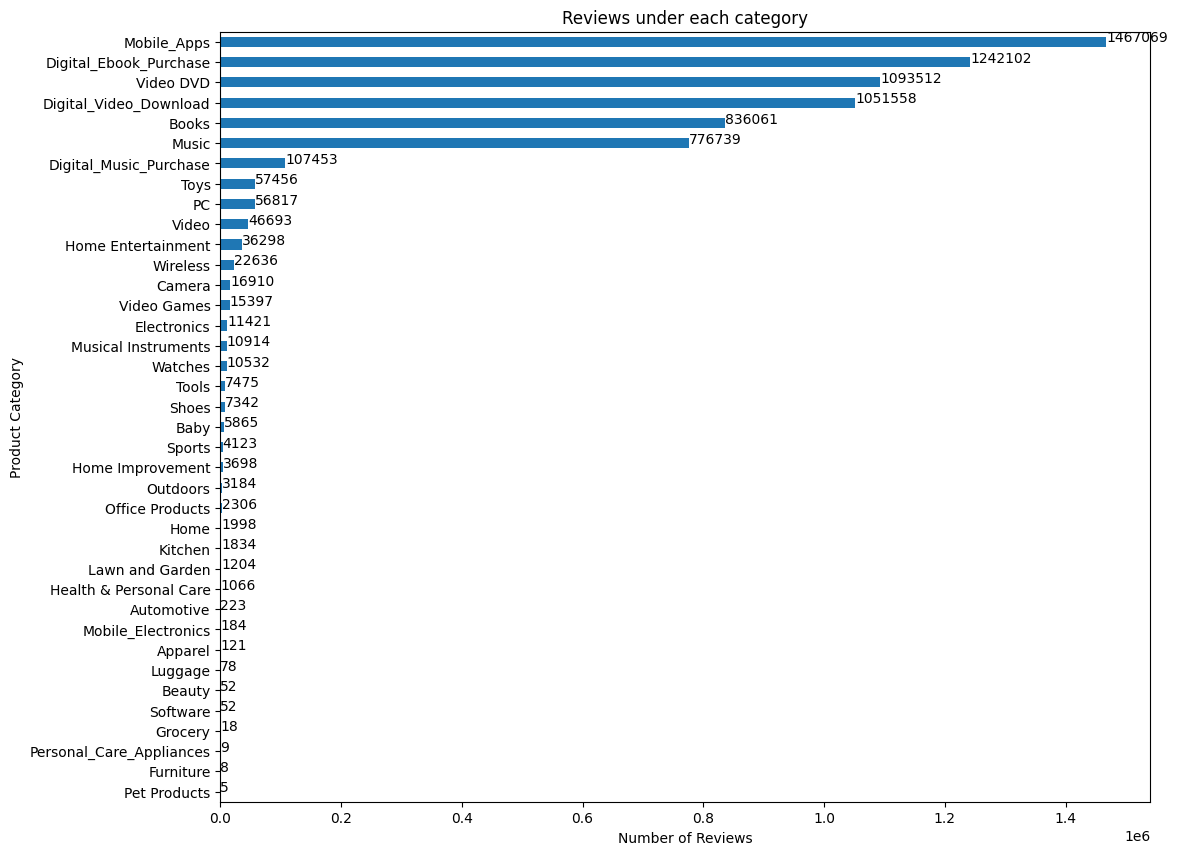

In [19]:
# Plotting number of reviews under each category
# Ref: https://www.kite.com/python/answers/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib-in-python

plt.rcdefaults()
plt.xlabel('Number of Reviews')
plt.ylabel('Product Category')
plt.title('Reviews under each category')
df['product_category'].value_counts(ascending = True).plot.barh(figsize = (12, 10))
for index, value in enumerate(df['product_category'].value_counts(ascending = True)):
    plt.text(value, index, str(value))

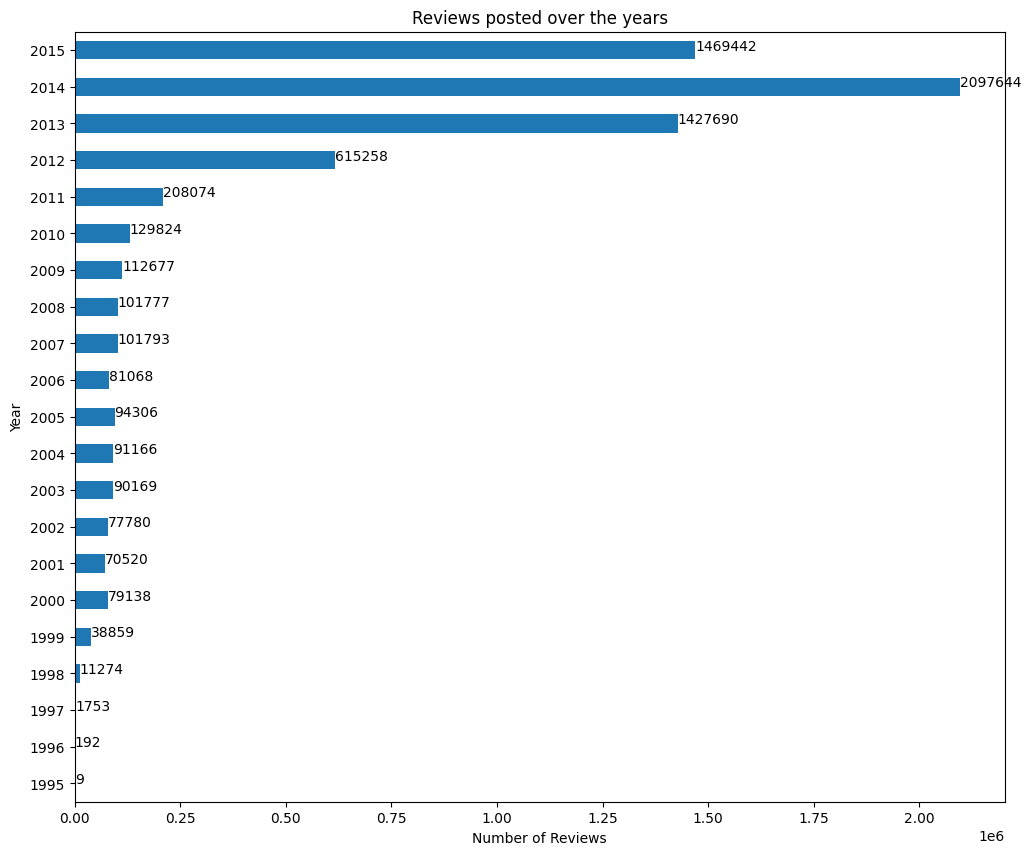

In [20]:
# Plotting number of reviews over the years
# Ref: https://stackoverflow.com/questions/43682672/plot-pandas-dataframe-against-month

plt.rcdefaults()
df['review_date'].groupby(df['review_date'].dt.to_period('Y')).count().plot.barh(figsize = (12, 10))
plt.xlabel('Number of Reviews')
plt.ylabel('Year')
plt.title('Reviews posted over the years')
for index, value in enumerate(df['review_date'].groupby(df['review_date'].dt.to_period('Y')).count()):
    plt.text(value, index, str(value))

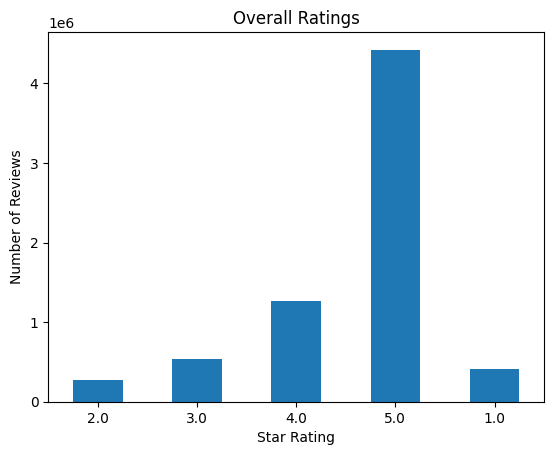

In [21]:
# Plotting number of overall ratings

plt.rcdefaults()
plt.xlabel('Star Rating')
plt.ylabel('Number of Reviews')
plt.title('Overall Ratings')
df['star_rating'].value_counts(sort = False).plot.bar(rot = 0)

In [22]:
df.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17


**Data Cleaning**

In [23]:
import wordcloud
from nltk.corpus import stopwords
import nltk
import string
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
# Function to clean the review text. Converting to lower case, square brackets, extra spaces, URLs, html tags, removing punctuation, new line, words containing numbers and special characters

def cleantext(text):
    # Converting to lower case
    text = text.lower()
    # removing URLs
    text = re.sub('https?://\S+|www\.\S+', '', text)
    # removing mentions
    text = re.sub('@\S+', '', text)
    # removing hashtags
    text = re.sub('#\S+', '', text)
    # removing punctuations
    text = re.sub('[^-9A-Za-z ]', ' ' , text)
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\W",' ',text) 
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('[‘’“”…]', '', text)
    # removing new line
    text = re.sub('\n', '', text)
    # removing numbers
    text = re.sub('\w*\d\w*', '', text)
    # removing single characters
    text = re.sub('\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub('\^[a-zA-Z]\s+', ' ', text)
    # removing overspaces
    text = re.sub('\s+', ' ', text) 
    return text

In [25]:
df['CLEAN_REVIEW_TEXT'] = df['review_body'].apply(cleantext)

In [26]:
df['CLEAN_PRODUCT_TITLE'] = df['product_title'].apply(cleantext)

In [27]:
df['CLEAN_REVIEW_TITLE'] = df['review_headline'].apply(cleantext)

In [28]:
df.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome


In [29]:
# Remove emojis
# Reference : https://gist.github.com/slowkow/7a7f61f495e3dbb7e3d767f97bd7304b

def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [30]:
df['CLEAN_REVIEW_TEXT'] = df['CLEAN_REVIEW_TEXT'].apply(lambda x: remove_emoji(x))

In [31]:
df['CLEAN_PRODUCT_TITLE'] = df['CLEAN_PRODUCT_TITLE'].apply(lambda x: remove_emoji(x))

In [32]:
df['CLEAN_REVIEW_TITLE'] = df['CLEAN_REVIEW_TITLE'].apply(lambda x: remove_emoji(x))

In [33]:
df.head(2)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome


In [34]:
# Checking for null values

df.isna().sum()

marketplace            0
customer_id            0
review_id              0
product_id             0
product_parent         0
product_title          0
product_category       0
star_rating            0
helpful_votes          0
total_votes            0
vine                   0
verified_purchase      0
review_headline        0
review_body            0
review_date            0
CLEAN_REVIEW_TEXT      0
CLEAN_PRODUCT_TITLE    0
CLEAN_REVIEW_TITLE     0
dtype: int64

In [35]:
# Dropping rows with null values

df = df.dropna()
df = df.reset_index(drop=True)
df.shape

(6900413, 18)

In [36]:
df_copy = df.copy()

In [37]:
# Saving the dataset into a dataframe from Google Drive

df.to_csv(r'/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_cleaned.csv', index = False)

In [38]:
# Loading the dataset into a dataframe from Google Drive

df_clean = pd.read_csv('/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_cleaned.csv')

In [39]:
df_clean.head(5)

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,US,53096384,R63J84G1LOX6R,1563890119,763187671,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,0.0,1.0,N,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below
1,US,53096399,R1BALOA11Z06MT,1559947608,381720534,The 22 Immutable Laws of Marketing,Books,4.0,0.0,0.0,N,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome
2,US,53096332,R1LLAY5W5PZUS4,0671701800,860650224,Contact,Books,5.0,1.0,2.0,N,N,Read the book. It's good.,This is a book about first contact with aliens...,1995-08-30,this is book about first contact with aliens w...,contact,read the book it good
3,US,53096335,R3R9VTJ82FXECQ,0425132153,624269601,Good Omens,Books,5.0,0.0,0.0,N,N,Funniest book ever written about the Anti-Christ,This is quite possibly *the* funniest book I h...,1995-09-11,this is quite possibly the funniest book have ...,good omens,funniest book ever written about the anti christ
4,US,51747709,R1P5J3FNBWTFXY,0517122707,161411385,A Confederacy of Dunces,Books,5.0,0.0,0.0,N,N,A winner that didn't last. Only a mothers love...,The story behind the book is almost better tha...,1995-10-17,the story behind the book is almost better tha...,a confederacy of dunces,a winner that didn last only mothers love rema...


In [40]:
df_clean.shape

(6900413, 18)

In [41]:
df_clean.isna().sum()

marketplace              0
customer_id              0
review_id                0
product_id               0
product_parent           0
product_title            0
product_category         0
star_rating              0
helpful_votes            0
total_votes              0
vine                     0
verified_purchase        0
review_headline          0
review_body              0
review_date              0
CLEAN_REVIEW_TEXT      105
CLEAN_PRODUCT_TITLE    981
CLEAN_REVIEW_TITLE     784
dtype: int64

In [42]:
# Dropping rows with null values

df_clean = df_clean.dropna()
df_clean = df_clean.reset_index(drop=True)
df_clean.shape

(6898566, 18)

In [43]:
# Dropping unused columns

df_clean = df_clean.drop(["marketplace","customer_id","review_id","product_id","product_parent","helpful_votes","total_votes","vine"], axis=1)
df_clean.head(2)

,product_title,product_category,star_rating,verified_purchase,review_headline,review_body,review_date,CLEAN_REVIEW_TEXT,CLEAN_PRODUCT_TITLE,CLEAN_REVIEW_TITLE
0,The Sandman Vol. 1: Preludes and Nocturnes,Books,4.0,N,ignore the review below,this is the first 8 issues of the series. it i...,1995-08-13,this is the first issues of the series it is t...,the sandman vol preludes and nocturnes,ignore the review below
1,The 22 Immutable Laws of Marketing,Books,4.0,N,awesome,I've always been partial to immutable laws. Th...,1995-08-17,i ve always been partial to immutable laws the...,the immutable laws of marketing,awesome


In [44]:
# Saving the dataset into a dataframe from Google Drive

df_clean.to_csv(r'/content/gdrive/MyDrive/DATA 606 - Capstone Project/amazon_reviews_clean.csv', index = False)